## MARIANA PAIR COUNTS

In [89]:
%pylab inline
binfile_name = '/mnt/store1/oliverphilcox/Mock1QPM2/radial_binning_cov.csv'
new_m = 12
qpm_dir = '/mnt/store1/oliverphilcox/QPMcounts/'

Populating the interactive namespace from numpy and matplotlib


In [90]:
# Define new binining
binfile = np.loadtxt(binfile_name)
new_n = len(binfile)
new_r_center = np.mean(binfile,axis=1)
all_mu = np.linspace(0.,1.,new_m+1)
new_mu_bins = np.vstack([all_mu[:-1],all_mu[1:]]).T

# Find bin widths and centers
r_bins = np.genfromtxt(qpm_dir+'qpm-unrecon-0001-DD.dat',max_rows=1)
r_center = 0.5*(r_bins[:-1]+r_bins[1:])
nmu = len(np.genfromtxt(qpm_dir+'qpm-unrecon-0001-DD.dat',max_rows=1,skip_header=1))-1
mu_bins = np.linspace(0.,1.,nmu+1)
mu_center = 0.5*(mu_bins[:-1]+mu_bins[1:])

# Find RR counts
RR_mock = np.loadtxt(qpm_dir+'qpm-unrecon-0001-RR.dat',skiprows=2)
N_R_1=np.genfromtxt(qpm_dir+'qpm-unrecon-0001-norm.dat'.zfill(4),max_rows=2)[1,1]

In [91]:
# Sub-bin:
def rebinner(input_array):
    rebinned_array = np.zeros([new_n,new_m])
    for r_i,radial_bin in enumerate(binfile):
        which_rbin = np.where((r_center>radial_bin[0])&(r_center<radial_bin[1]))
        this_arr = input_array[which_rbin[0],:]
        for mu_i,mu_bin in enumerate(new_mu_bins):
            which_mubin = np.where((mu_center>mu_bin[0])&(mu_center<mu_bin[1]))
            rebinned_array[r_i,mu_i] = this_arr[:,which_mubin[0]].sum()
    return rebinned_array

In [193]:
RR = rebinner(RR_mock)

def QPM_xi(mock_no):
    DD_mock = np.loadtxt(qpm_dir+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4),skiprows=2)
    DR_mock = np.loadtxt(qpm_dir+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4),skiprows=2)
    # Now rebin these:
    DD = rebinner(DD_mock)
    DR = rebinner(DR_mock)    
    
    tmp=np.genfromtxt(qpm_dir+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4),max_rows=2)
    N_R_i = tmp[1,1] # total randoms
    N_D_i = tmp[0,1] # total galaxies
    # Landy-Szalay estimator
    xi_mock = (DD/(N_D_i*(N_D_i-1.))-2.*DR/(N_D_i*N_R_i))/(RR/(N_R_1*(N_R_1-1)))+1
    return xi_mock,N_D_i

In [194]:
RR = rebinner(RR_mock)


mock_no = 3
DD_mock = np.loadtxt(qpm_dir+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4),skiprows=2)
DR_mock = np.loadtxt(qpm_dir+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4),skiprows=2)
# Now rebin these:
DD = rebinner(DD_mock)
DR = rebinner(DR_mock)    

#DD/=np.sum(DD)
#DR/=np.sum(DR)


tmp=np.genfromtxt(qpm_dir+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4),max_rows=2)
N_R_i = tmp[1,1] # total randoms
N_D_i = tmp[0,1] # total galaxies

#xi_mock = (DD-2.*DR)/(RR/np.sum(RR))+1.

#return xi_mock,N_D_i


tmp=np.genfromtxt(qpm_dir+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4),max_rows=2)
N_R_i = tmp[1,1] # total randoms
N_D_i = tmp[0,1] # total galaxies
# Landy-Szalay estimator
xi_mock = (DD/(N_D_i*(N_D_i-1.))-2.*DR/(N_D_i*N_R_i))/(RR/(N_R_1*(N_R_1-1)))+1


In [196]:
all_xi = []
all_N_gal = []
for i in range(2,100):
    tmp=QPM_xi(i)
    all_xi.append(tmp[0])
    all_N_gal.append(tmp[1])

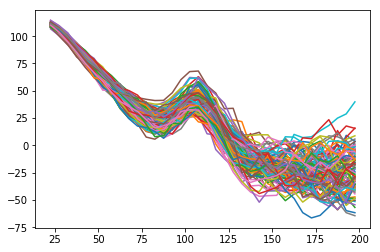

In [197]:
for i in range(98):
    plt.plot(new_r_center,all_xi[i].mean(axis=1)*new_r_center**2.)

In [198]:
flat_xi = np.asarray([xi.reshape(new_n*new_m) for xi in all_xi])
mean_xi = flat_xi.mean(axis=0)

### Compare to input QPM mock

In [235]:
xi_qpm1 = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',skiprows=2)
r_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1)
mu_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1,skip_header=1)

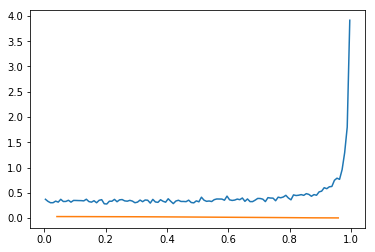

In [245]:
plt.plot(mu_qpm,xi_qpm1.mean(axis=0))
plt.plot(new_mu_bins.mean(axis=1),QPM_xi(1)[0].mean(axis=0))

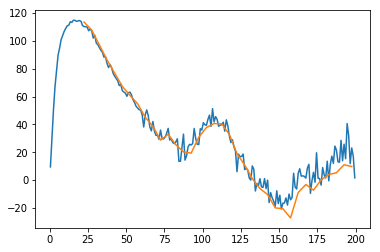

In [234]:
plt.plot(r_qpm,r_qpm*r_qpm*xi_qpm1.mean(axis=1))
plt.plot(new_r_center,new_r_center**2.*QPM_xi(1)[0].mean(axis=1))

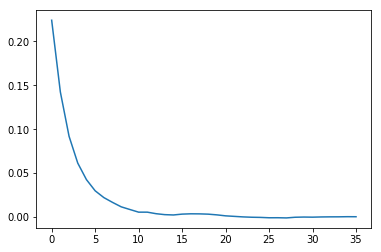

In [223]:
plt.plot(QPM_xi(1)[0].mean(axis=1))

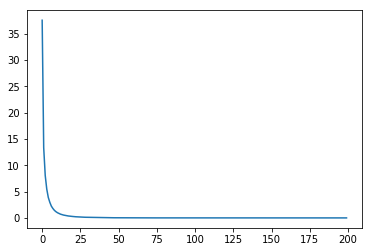

In [226]:
plt.plot(xi_qpm1.mean(axis=1))
#plt.plot(QPM_xi(1)[0].mean(axis=1))

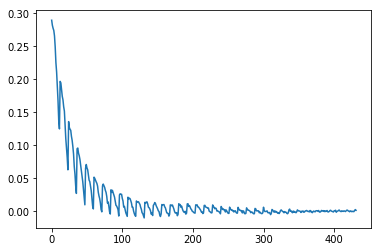

In [208]:
#plt.plot(xi_qpm1[:,:].reshape(200,120));
plt.plot(QPM_xi(1)[0].reshape(new_n*new_m));

### Check weights scalings

In [249]:
randoms = '/mnt/store1/oliverphilcox/Mock1QPM2/qpm_galaxies.xyzwj'

In [180]:
with open(randoms,"r") as infile:
    lc=0
    for line in infile:
        lc+=1
weights = np.zeros(lc)

In [181]:
with open(randoms,"r") as infile:
    for l,line in enumerate(infile):
        split_line=np.array(line.split(" "), dtype=float) 
        weights[l] = split_line[-2]

In [182]:
gal_weights = weights

In [178]:
random_weights = weights

In [192]:
(gal_weights.sum()/random_weights.sum()-0.1)*10*100

0.2828759575315143

(array([13.69594784,  4.02338886,  1.97123241,  1.15527564,  0.84001132,
         0.63512784,  0.27288596,  0.35421153,  0.30358381,  0.18422358]),
 array([0.104512 , 0.1471816, 0.1898512, 0.2325208, 0.2751904, 0.31786  ,
        0.3605296, 0.4031992, 0.4458688, 0.4885384, 0.531208 ]),
 <a list of 10 Patch objects>)

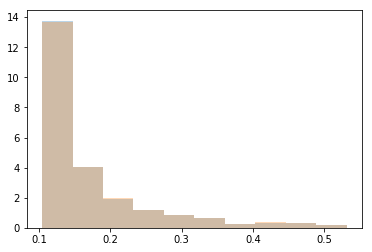

In [187]:
plt.hist(random_weights,density=True,alpha=0.3)
plt.hist(gal_weights,density=True,alpha=0.3)

In [250]:
cov = np.matmul((flat_xi-mean_xi).T,flat_xi-mean_xi)/((len(flat_xi)-1))
np.save('/mnt/store1/oliverphilcox/Mock1QPM/98QPMCovariance.npy',cov)

In [251]:
all_cov=np.load('/mnt/store1/oliverphilcox/Mock1QPM/Rescaled_Covariance_Matrices_n39_m24_j169.npz')
theory_cov=all_cov.f.full_theory_covariance
data_jack_cov = all_cov.f.jackknife_data_covariance

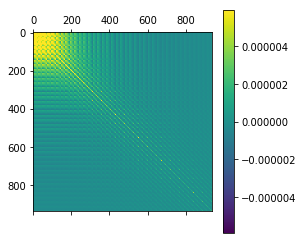

In [252]:
vmax=np.percentile(theory_cov,99.)
plt.matshow(theory_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

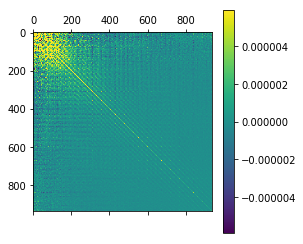

In [253]:
plt.matshow(data_jack_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

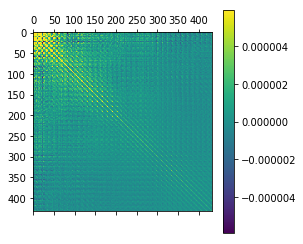

In [254]:
plt.matshow(cov,vmax=vmax,vmin=-vmax);plt.colorbar()

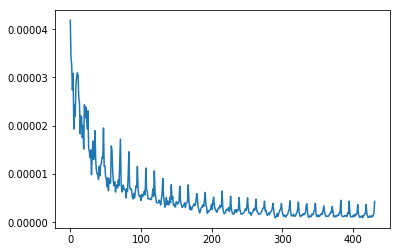

In [256]:
plt.plot(np.diag(cov),label='QPM Mocks')
#plt.plot(np.diag(theory_cov),label='Theory')
#plt.plot(np.diag(data_jack_cov),label='Jackknife Mock1')
#plt.yscale('log');plt.legend();

In [257]:
chol = np.linalg.cholesky(np.linalg.inv(theory_cov))
disc = np.matmul(chol,np.matmul(cov,chol.T))
plt.matshow(disc-np.eye(len(disc)),vmax=3,vmin=-3);plt.colorbar();

ValueError: shapes (432,432) and (936,936) not aligned: 432 (dim 1) != 936 (dim 0)